In [15]:
import autoencodeSVJ.utils as utils
import autoencodeSVJ.evaluate as evaluate

### summaries of models
Grab the model summary table, which shows all newly trained models (i just implemented this) and their parameters.

Naturally it's a DataFrame, so you can do all the usual fun stuff with it.

In [16]:
data = utils.data_table(utils.summary()) #.cdrop(['filepath', 'summary_path', '*_path', '*_split', 'norm_type'])
data

,batch_size,eflow,eflow_base,epochs,filename,filepath,hlf,input_dim,learning_rate,loss,...,mse_auc,norm_type,optimizer,qcd_path,seed,signal_path,summary_path,target_dim,test_split,val_split
0,64,True,3,100,hlf_eflow3_8_v2,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,True,19,0.0005,mse,...,0.927064,StandardScaler,adam,NaN,42,NaN,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,8,0.15,0.15
1,64,True,3,100,hlf_eflow3_7_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,True,19,0.0005,mse,...,0.88065,StandardScaler,adam,NaN,42,NaN,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,7,0.15,0.15
2,64,True,4,100,hlf_eflow4_8_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,True,42,0.0005,mse,...,0.962543,StandardScaler,adam,NaN,40,NaN,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,8,0.15,0.15
3,64,True,3,100,hlf_eflow3_8_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,True,19,0.0005,mse,...,0.925903,StandardScaler,adam,NaN,40,NaN,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,8,0.15,0.15
4,64,True,3,100,eflow3_8_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,False,12,0.0005,mse,...,0.995134,StandardScaler,adam,NaN,40,NaN,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,8,0.15,0.15
5,64,True,4,100,eflow4_8_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,False,35,0.0005,mse,...,0.992809,StandardScaler,adam,NaN,40,NaN,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,8,0.15,0.15
6,64,True,4,100,eflow4_20_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,False,35,0.0005,mse,...,0.989279,StandardScaler,adam,NaN,40,NaN,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,20,0.15,0.15
7,64,True,4,100,eflow4_16_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,False,35,0.0005,mse,...,0.990463,StandardScaler,adam,NaN,40,NaN,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,16,0.15,0.15
8,64,True,4,100,eflow4_12_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,False,35,0.0005,mse,...,0.99049,StandardScaler,adam,NaN,40,NaN,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,12,0.15,0.15
9,64,True,4,100,hlf_eflow4_5_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,True,42,0.0005,mse,...,0.774533,StandardScaler,adam,data/background/base_4/*.h5,40,data/signal/base_4/*.h5,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,5,0.15,0.15


In [17]:
utils.data_table(data.sort_values('mae_auc')).cfilter(["filepath", 'mae_auc', 'filename'])

,filename,filepath,mae_auc
0,hlf_eflow3_4_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,0.740626
1,hlf_eflow4_5_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,0.849114
2,hlf_eflow3_7_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,0.905729
3,hlf_eflow3_8_v2,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,0.933888
4,hlf_eflow3_8_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,0.935168
5,hlf_eflow4_8_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,0.976987
6,hlf_eflow3_10_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,0.982155
7,eflow4_20_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,0.990118
8,eflow4_16_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,0.990889
9,eflow4_12_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,0.991403


### grab some models
we can do this by specifying the name, data path, and signal path. (last two are optional if they're included in the table above, but most arent)

In [4]:
eflow3 = evaluate.ae_evaluation('eflow3_8_v1', "data/background/base_3/*.h5", "data/signal/base_3/*.h5")
eflow4 = evaluate.ae_evaluation('eflow4_8_v1', "data/background/base_4/*.h5", "data/signal/base_4/*.h5")
comb3 = evaluate.ae_evaluation('hlf_eflow3_8_v1', "data/background/base_3/*.h5", "data/signal/base_3/*.h5")
comb4 = evaluate.ae_evaluation('hlf_eflow4_8_v1', "data/background/base_4/*.h5", "data/signal/base_4/*.h5")

h5_elt 'metric_names' :: loading dataset 'data/metric_names' from file 'eflow3_8_v1.h5'
h5_elt 'training' :: loading dataset 'params/training' from file 'eflow3_8_v1.h5'
h5_elt 'config' :: loading dataset 'params/config' from file 'eflow3_8_v1.h5'
h5_elt 'loss' :: loading dataset 'metric_names/loss' from file 'eflow3_8_v1.h5'
h5_elt 'lr' :: loading dataset 'metric_names/lr' from file 'eflow3_8_v1.h5'
h5_elt 'val_loss' :: loading dataset 'metric_names/val_loss' from file 'eflow3_8_v1.h5'
train_shell :: using saved model
h5_elt 'metric_names' :: loading dataset 'data/metric_names' from file 'eflow4_8_v1.h5'
h5_elt 'training' :: loading dataset 'params/training' from file 'eflow4_8_v1.h5'
h5_elt 'config' :: loading dataset 'params/config' from file 'eflow4_8_v1.h5'
h5_elt 'loss' :: loading dataset 'metric_names/loss' from file 'eflow4_8_v1.h5'
h5_elt 'lr' :: loading dataset 'metric_names/lr' from file 'eflow4_8_v1.h5'
h5_elt 'val_loss' :: loading dataset 'metric_names/val_loss' from file 

data_table :: plotting distrubution(s) for table(s) ['signal0', 'down', 'up', 'strange', 'charm', 'bottom', 'gluon']


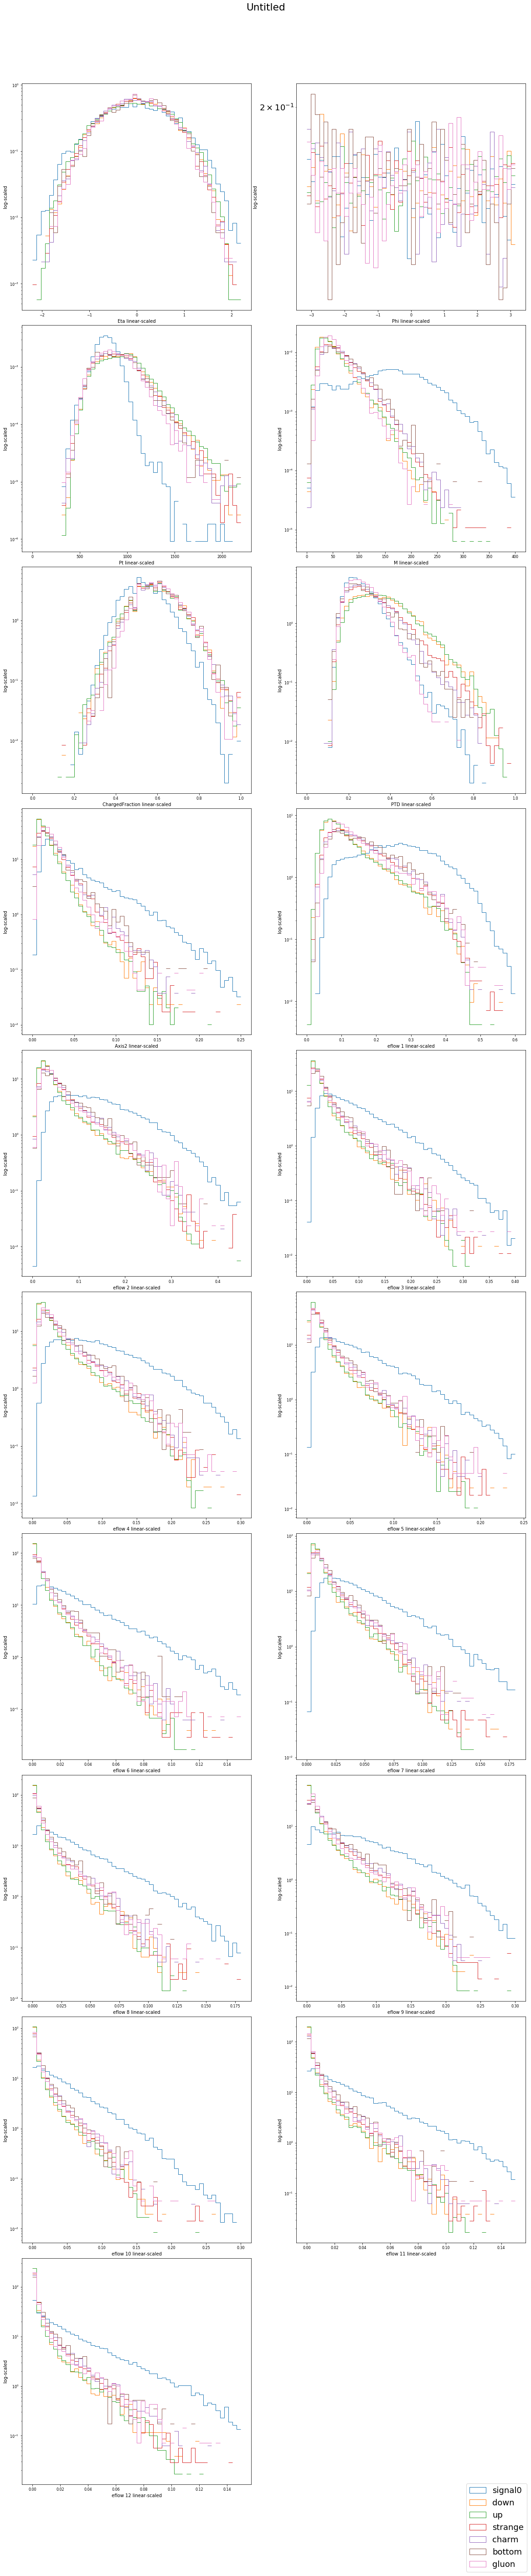

In [78]:

def jets_by_flavor(data, flavor):
    assert len(data) == 2
    assert len(data[0]) == len(data[1])
    assert len(flavor) == 2*len(data[0])
    
    return [
        utils.jet_flavor_split(data[0], flavor[0::2].reset_index(drop=True)),
        utils.jet_flavor_split(data[1], flavor[1::2].reset_index(drop=True)),
        ]

qcd_leading_flavorsplit, qcd_subleading_flavorsplit = jets_by_flavor(comb3.qcd_jets, comb3.qcd_flavor)

comb3.signal_jets[0].plot(qcd_leading_flavorsplit, normed=1, cols=2, bins=50, alpha=1, rng=((-2.2, 2.2), (-np.pi, np.pi), (0, 2200.), (0., 400.), (0., 1.), (0, 1), (0, 0.25), (0, 0.6), (0., 0.45), (0., 0.4), (0, 0.3), (0., 0.24), (0., 0.15), (0, 0.18), (0., 0.18), (0, 0.3), (0, .3), (0, 0.15), (0, 0.15)), yscale='log')

data_table :: plotting distrubution(s) for table(s) ['qcd test norm error', 'signal norm error']


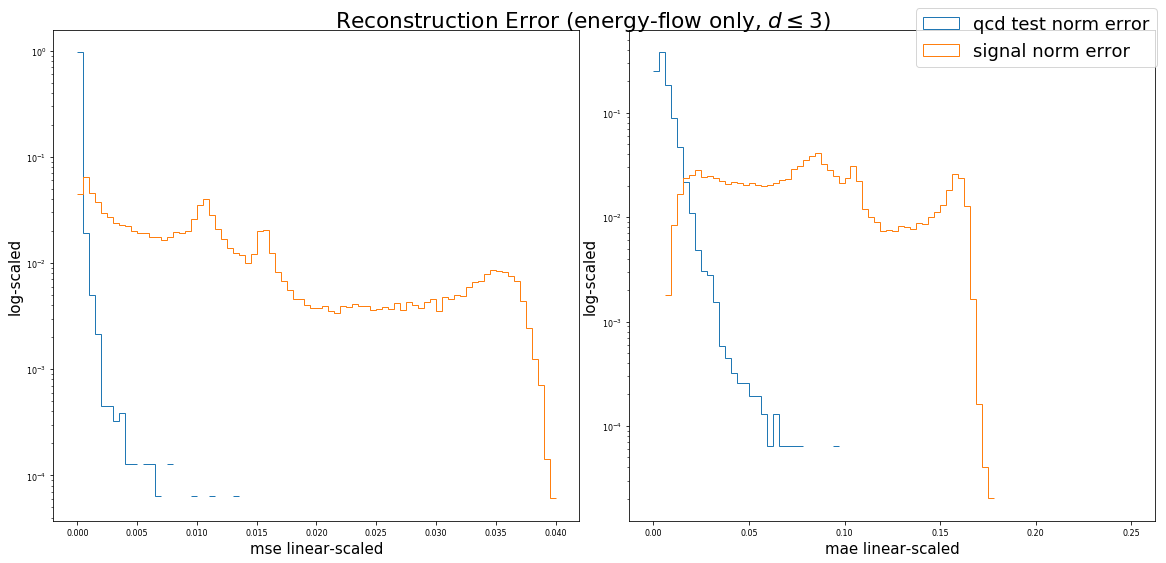

data_table :: plotting distrubution(s) for table(s) ['qcd test norm error', 'signal norm error']


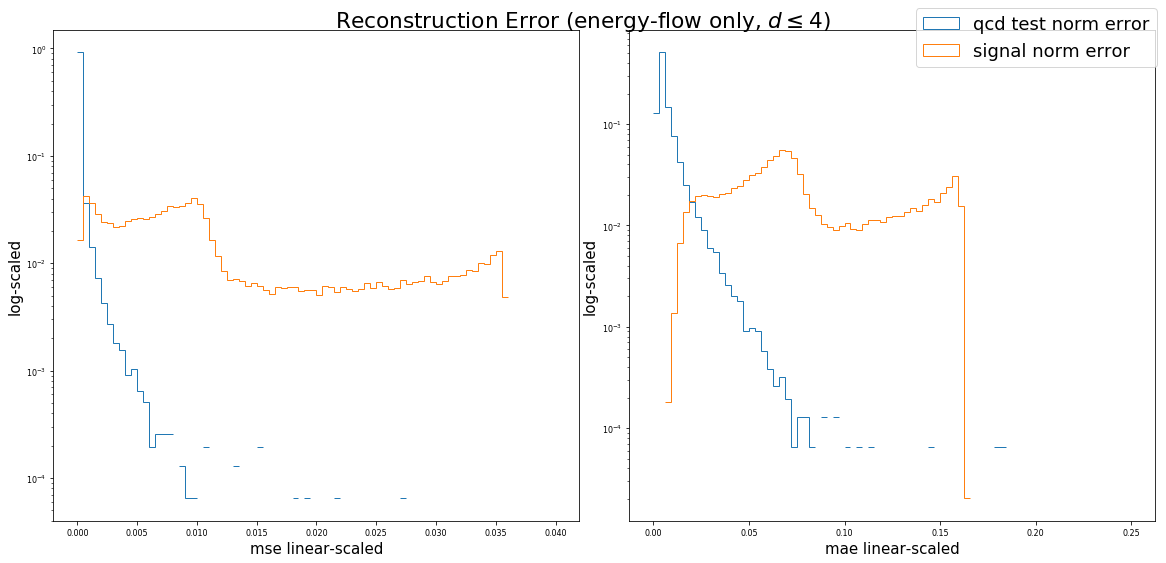

data_table :: plotting distrubution(s) for table(s) ['qcd test norm error', 'signal norm error']


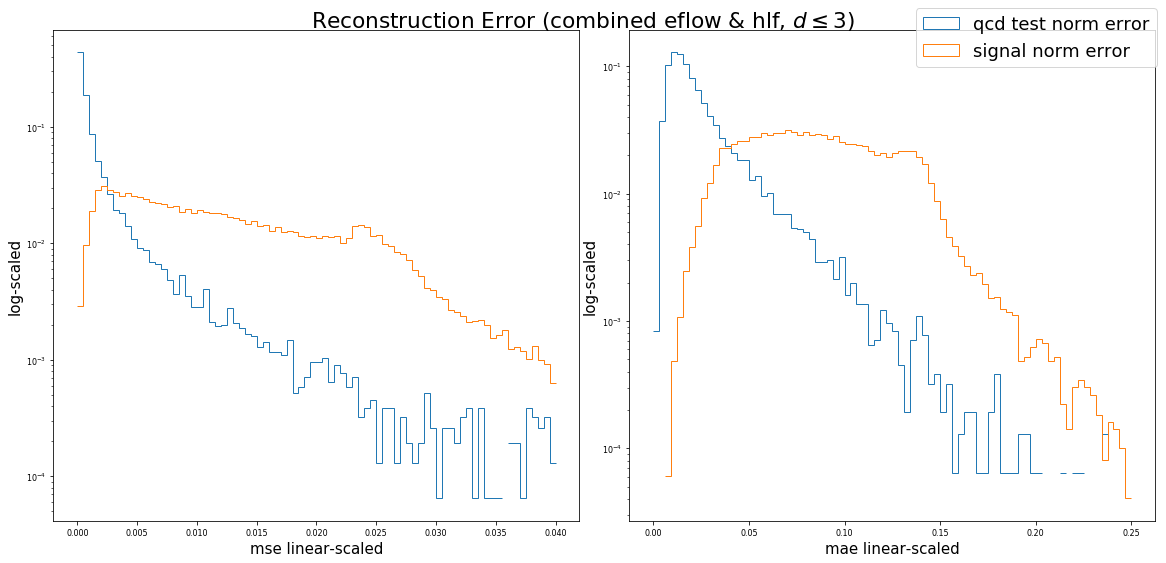

data_table :: plotting distrubution(s) for table(s) ['qcd test norm error', 'signal norm error']


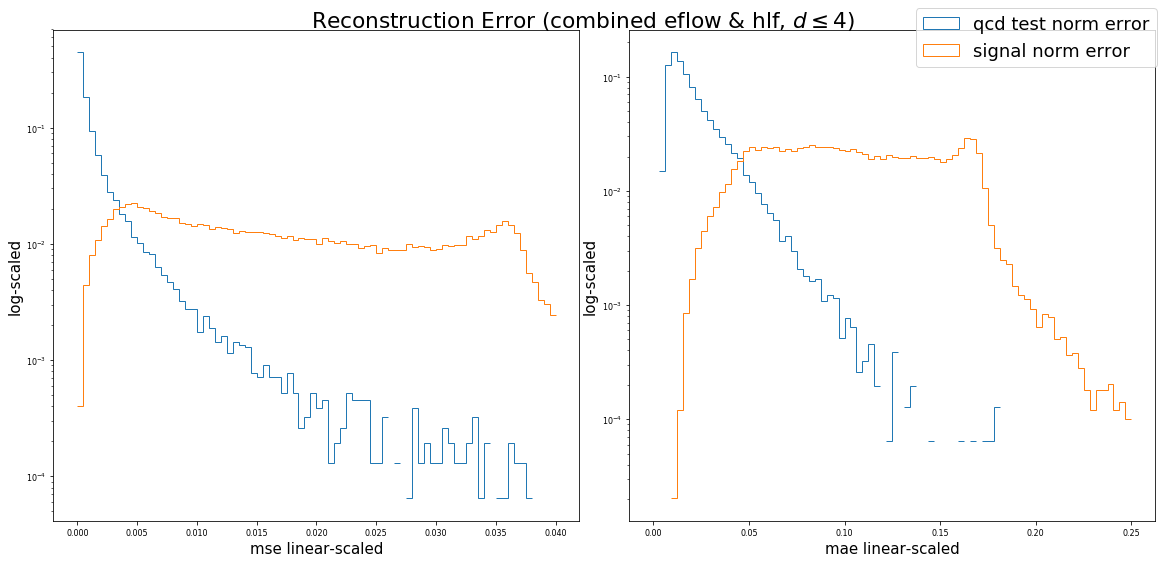

In [124]:
rng = ((0, 0.04), (0., 0.25))
yscale = 'log'
bins = 80
normed = 'n'

eflow3.error(
    rng=rng, yscale=yscale, 
    figname='Reconstruction Error (energy-flow only, $d\leq3$)', 
    figsize=16, fontsize=15, alpha=2, bins=bins, normed=normed
)
eflow4.error(
    rng=rng, yscale=yscale, 
    figname='Reconstruction Error (energy-flow only, $d\leq4$)', 
    figsize=16, fontsize=15, alpha=2, bins=bins, normed=normed
)
comb3.error(
    rng=rng, yscale=yscale, 
    figname='Reconstruction Error (combined eflow & hlf, $d\leq3$)', 
    figsize=16, fontsize=15, alpha=2, bins=bins, normed=normed
)
comb4.error(
    rng=rng, yscale=yscale, 
    figname='Reconstruction Error (combined eflow & hlf, $d\leq4$)', 
    figsize=16, fontsize=15, alpha=2, bins=bins, normed=normed
)



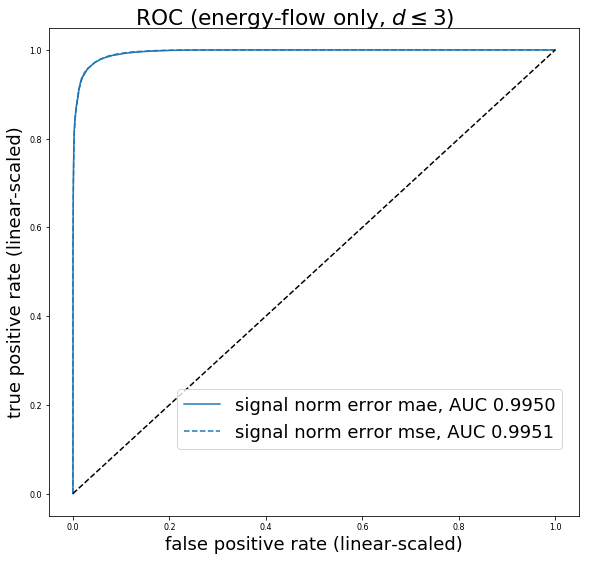

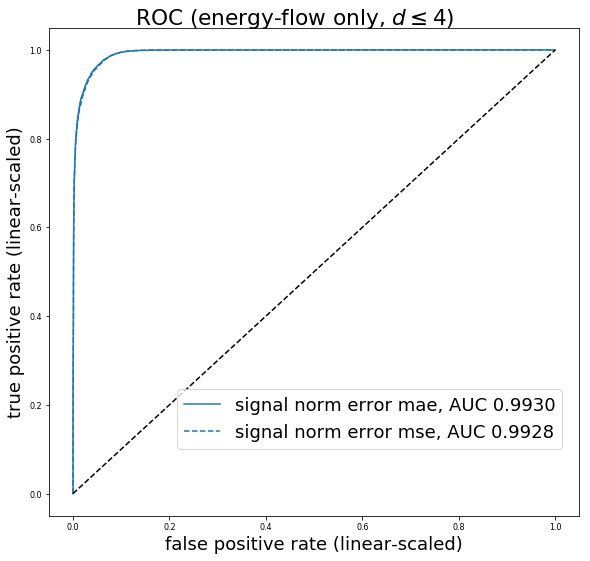

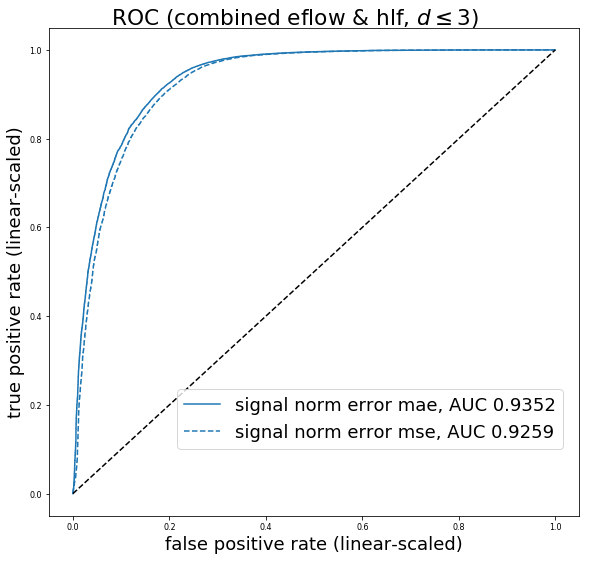

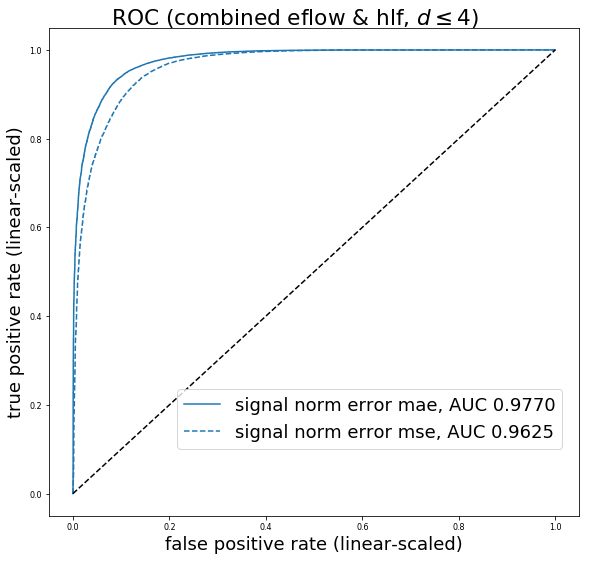

In [125]:
eflow3.roc(figname='ROC (energy-flow only, $d\leq3$)')
eflow4.roc(figname='ROC (energy-flow only, $d\leq4$)')
comb3.roc(figname='ROC (combined eflow & hlf, $d\leq3$)')
comb4.roc(figname='ROC (combined eflow & hlf, $d\leq4$)')

In [14]:
split = utils.jet_flavor_split(comb3.qcd, comb3.qcd_flavor)

    

In [ ]:
comb3.qcd